In [1]:
import pandas as pd 
import numpy as np 
import unicodedata
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy.sparse import csgraph
from numpy import linalg as LA
from sklearn import decomposition
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df=pd.read_excel('Tunga_Bhadra River Basin Rainfall Data (1).xls')

In [3]:
df.head()

,DATE,12.625N75.125E,12.625N75.375E,12.625N75.625E,12.625N75.875E,12.625N76.125,12.625N76.375,12.625N76.625E,12.875N75.125E,12.875N75.375E,...,15.125N76.125E,15.125N76.375E,15.125N76.675E,15.375N75.125E,15.375N75.375E,15.375N75.626E,15.375N75.875E,15.375N76.125E,15.375N76.375E,15.375N76.625E
0,1951-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1951-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1951-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1951-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1951-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
lat_long = df.columns
    

### Converting Unicode into strings

In [5]:
coordinates = []
for i in range(1,len(lat_long)):
    coordinates.append(unicodedata.normalize('NFKD', lat_long[i]).encode('ascii','ignore'))

In [6]:
#lat = 15.375
#longi = 76.375
lat = 12.625
longi = 75.125

### Finding the neighbours 

In [173]:
neighbours = []
for i in range(0,len(coordinates)):
    a= float(coordinates[i].split('N')[0])
    b= float((coordinates[i].split('N'))[1].split('E')[0])
    if a-lat == 0 and b-longi == 0:
        Y=coordinates[i]
    elif abs(a - lat) <= 0.250 and abs(b - longi) <=0.250:
        neighbours.append(coordinates[i])

In [174]:
neighbours

['12.625N75.375E', '12.875N75.125E', '12.875N75.375E']

In [175]:
Y

'12.625N75.125E'

In [176]:
X=pd.DataFrame()

In [177]:
for i in range(0,len(neighbours)):
    X[neighbours[i]]=df[neighbours[i]]


In [178]:
Xtrain = X.head(14000)

In [179]:
Ytrain= df[Y].head(14000)

In [180]:
np.shape(Xtrain)

(14000, 3)

In [181]:
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

In [182]:
np.shape(Ytrain)

(14000,)

### slicing the dataset to get non-zero values

In [183]:
NonZeros = [i for i in range(0,len(Ytrain)) if Ytrain[i] != 0]
Yt = Ytrain[NonZeros]
Xt = Xtrain[NonZeros]


In [184]:
len(Xt)

8013

In [185]:
reg = linear_model.LinearRegression()

In [186]:
reg.fit (Xt,Yt)

Xtest = X.tail(6000)
Y_actual = df[Y].tail(6000)

Y_predicted = reg.predict(Xtest)

### R2_Score

In [187]:
 r2_score(Y_actual, Y_predicted)

0.96637368515996092

### Scatter Plot 

In [188]:
plt.scatter(Y_actual,Y_predicted)

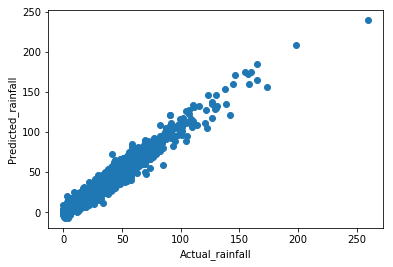

In [189]:
plt.xlabel('Actual_rainfall')
plt.ylabel('Predicted_rainfall')
plt.show()

In [190]:
Y_actual = Y_actual.reset_index()
Y_actual.drop('index',axis=1,inplace=True)

In [191]:
Y_actual['actual']=Y_actual[Y]
Y_actual.drop(Y,axis=1,inplace=True)

In [192]:
Y_actual.plot(color='r')

In [193]:
pd.Series(Y_predicted).plot(color='b')

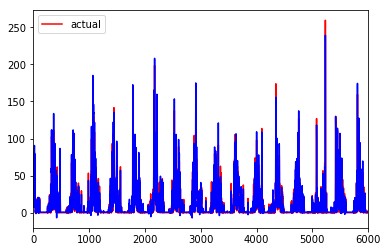

In [194]:
plt.show()

### Laplacian of Incidence Matrix

In [195]:
array = np.zeros((84, 84))

In [196]:
for i in range(1,len(lat_long)):
    array[i-1] =  df.corr()[lat_long[i]]

In [197]:
threshold = 0.5

### Adjacency Matrix from correlation Matrix

In [198]:
A = [[0 if x<=threshold else x for x in row] for row in array]

In [199]:
for i in range(0,len(A)):
    A[i][i] = 0

In [200]:
D = np.zeros((84, 84))

### Degree Matrix

In [201]:
for i in range(0,len(D)):
    D[i][i]=sum(A[i])
D

array([[ 17.02368813,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  18.68520261,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  18.89877749, ...,   0.        ,
          0.        ,   0.        ],
       ..., 
       [  0.        ,   0.        ,   0.        , ...,  12.29012904,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
         12.17919579,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,  12.18968452]])

In [202]:
plt.imshow(A)

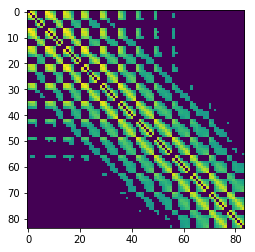

In [203]:
plt.show()

### Laplacian

In [204]:
L = D-A

In [205]:
#L = csgraph.laplacian(np.array(A), normed=False)

In [206]:
sum(L[:,1])

1.2212453270876722e-15

### VIsualising Adjacency Matrix

In [207]:
import networkx as nx
G = nx.from_numpy_matrix(np.array(A))
nx.draw(G,with_labels=True)

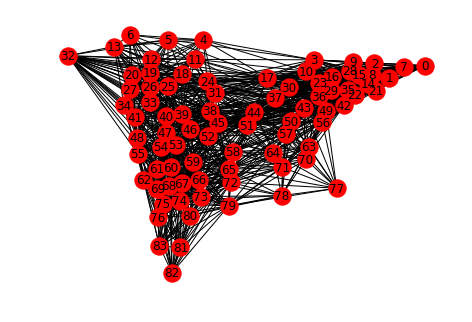

In [208]:
plt.show()

### Number of Connected_Components

In [209]:
csgraph.connected_components(A,directed = False)

(1, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32))

### Eigen Decomposition

In [210]:
w, v = LA.eig(L)

In [211]:
w

array([  1.33226763e-15,   3.09377259e+00,   4.00809480e+00,
         6.78976012e+00,   8.38760310e+00,   3.15798414e+01,
         9.46329464e+00,   1.02171351e+01,   1.08483740e+01,
         1.15562939e+01,   2.99134163e+01,   2.96584771e+01,
         2.92470622e+01,   1.22002862e+01,   1.29021623e+01,
         1.31310140e+01,   1.34097709e+01,   2.85229022e+01,
         2.83792618e+01,   2.82507786e+01,   2.78705836e+01,
         2.75818513e+01,   1.43188184e+01,   1.46026841e+01,
         1.50769992e+01,   2.71273031e+01,   2.67485906e+01,
         1.52486853e+01,   1.52215629e+01,   1.56804897e+01,
         2.65574998e+01,   2.63550568e+01,   2.62108367e+01,
         1.60859798e+01,   2.58484817e+01,   1.64901108e+01,
         2.58254144e+01,   1.66831917e+01,   1.69119962e+01,
         2.54036095e+01,   2.52742404e+01,   2.51153380e+01,
         1.72090634e+01,   2.47039279e+01,   2.44412089e+01,
         1.77069438e+01,   1.78625939e+01,   1.80424253e+01,
         1.86102921e+01,

In [212]:
lat = set()
lon = set()
with open('Lat.txt','r') as f:
    data = f.readlines()

In [213]:
lon

set()

In [214]:
for i in range(1,len(data)):
    x,y = data[i].split(',')
    lat.add(x.strip())
    lon.add(y.strip())

In [215]:
lat = list(lat)
lon =  list(lon)

In [216]:
intensity = np.zeros((12,10))

In [217]:
x,y = np.meshgrid([1]*10,[1]*12)

In [218]:
np.shape(x)

(12, 10)

### Visualising the eigen matrix

[[ 28.06948209  11.33972191  32.81394982   0.          21.55729491
   34.70403368   0.          15.915318    31.8611073    0.        ]
 [ 24.27323157   6.45242436  31.69585508   0.          13.03781751
   33.01496779   0.           8.98004704  29.64254099   0.        ]
 [ 33.99683701  18.27332296  36.64121394   0.          29.61259694   0.
   37.48181482  21.7783225   35.78873644   0.        ]
 [ 25.75108652   9.1397036   31.663203     0.          19.69391354
   34.00908989   0.          13.68477582  29.29522881   0.        ]
 [ 31.37106479  12.71528079  34.48434703   0.          26.68794757
   35.94928632   0.          17.63314252  33.58952021   0.        ]
 [ 25.09286049   6.39202945  31.3387374    0.           0.          32.47845524
    0.           7.34333052  30.0044821    9.63138562]
 [ 10.28633087   5.33232506  31.26934283   0.           5.80117126
   33.26487806   0.           5.97339453  27.07684743   0.        ]
 [  9.51103795   5.          30.68189756   0.           5.67880

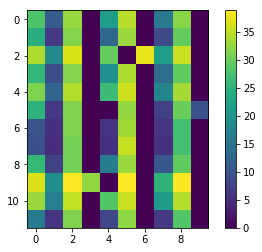

In [219]:
for c,val in zip(coordinates,v[:,1]):
    a= c.split('N')[0]
    b= c.split('N')[1].split('E')[0]
    i = lat.index(a.strip())
    j = lon.index(b.strip())
    intensity[i][j] = val
mi = np.min(intensity)
for i in range(0,12):
    for j in range(0,10):
        if(intensity[i][j]==0):
            intensity[i][j]=0
        else:
            intensity[i][j]=(intensity[i][j] + abs(mi))*100 + 5.0
print intensity
plt.imshow(intensity)
plt.colorbar()
plt.show()

In [220]:
vt=list(v[:,0])
vt.sort()
plt.plot(vt)

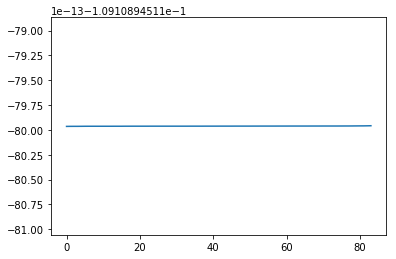

In [221]:
plt.show()

### 3D Projection 

In [222]:
np.max(v[:,1])

0.15137830100848826

### Min Max Normalisation

In [223]:
X=(v[:,1]-np.min(v[:,1]))/(np.max(v[:,1])-np.min(v[:,1]))
Y=(v[:,2]-np.min(v[:,2]))/(np.max(v[:,2])-np.min(v[:,2]))
Z=(v[:,3]-np.min(v[:,3]))/(np.max(v[:,3])-np.min(v[:,3]))

In [224]:
Z

array([ 0.95723759,  0.94560798,  0.94385287,  0.91720402,  0.74901702,
        0.73332687,  0.53712577,  0.94789514,  0.93712874,  0.94222281,
        0.90870061,  0.81739057,  0.7972391 ,  0.77305338,  0.93779386,
        0.93119704,  0.91559599,  0.88393007,  0.8338146 ,  0.8247    ,
        0.81960772,  0.93254092,  0.91941313,  0.90903348,  0.86075984,
        0.84360491,  0.8448702 ,  0.84616551,  0.93119202,  0.90352869,
        0.88801923,  0.86432306,  0.87067381,  0.86491135,  0.88789964,
        0.90555593,  0.87689835,  0.86509106,  0.86244335,  0.87615796,
        0.88105746,  0.89598439,  0.86282119,  0.8276879 ,  0.84048045,
        0.86480564,  0.87461382,  0.89635318,  0.92016407,  0.82446565,
        0.78143843,  0.82916786,  0.86409202,  0.89544644,  0.90714058,
        0.93862531,  0.77318859,  0.72275392,  0.82366733,  0.88221325,
        0.91524811,  0.92387649,  0.95637924,  0.60539418,  0.6537835 ,
        0.79878989,  0.87424045,  0.924569  ,  0.93506128,  0.94

In [225]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(X, Y, Z)

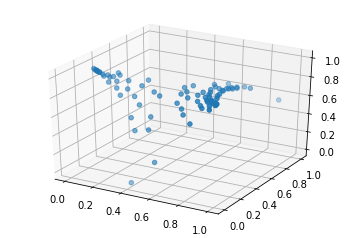

In [226]:
plt.show()

### Kmeans Clustering 

In [227]:
from sklearn.cluster import KMeans 

In [228]:
X= np.zeros((84,3))

In [229]:
X= zip(v[:,1],v[:,2],v[:,3])

In [230]:
np.shape(X)

(84, 3)

In [231]:
X = np.array(X)

In [232]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [233]:
labels = kmeans.labels_

In [234]:
threedee = plt.figure().gca(projection='3d')

In [235]:
threedee.scatter(X[:,0],X[:,1],X[:,2],c=labels.astype(np.float), edgecolor='k')


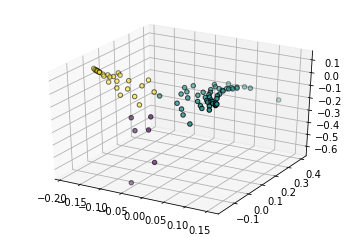

In [236]:
plt.show()

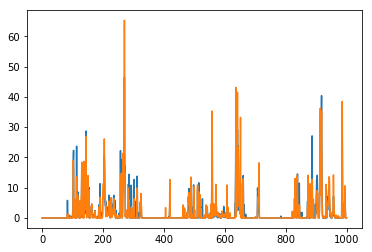

In [237]:
plt.plot(df[df.columns[5]].head(1000))
plt.plot(df[df.columns[12]].head(1000))
plt.show()

In [238]:
#Label = 1
#predictIdx = 48
Label = 2
predictIdx = 0

In [239]:
Cluster = [i for i in range(0,len(labels)) if labels[i] == Label]
to_predict = coordinates[Cluster[predictIdx]]
neighbours = []
for i in range(0,len(Cluster)):
    if i != predictIdx:
        neighbours.append(coordinates[Cluster[i]])
to_predict

'12.625N75.125E'

In [240]:
X=pd.DataFrame()

In [241]:
for i in range(0,len(neighbours)):
    X[neighbours[i]]=df[neighbours[i]]

In [242]:
Xtrain = X.head(14000)
Ytrain= df[to_predict].head(14000)

In [243]:
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

In [244]:
NonZeros = [i for i in range(0,len(Ytrain)) if Ytrain[i] != 0]
Yt = Ytrain[NonZeros]
Xt = Xtrain[NonZeros]

In [245]:
reg = linear_model.LinearRegression()
reg.fit (Xt,Yt)

Xtest = X.tail(6000)
Y_actual = df[to_predict].tail(6000)

Y_predicted = reg.predict(Xtest)

In [246]:
r2_score(Y_actual, Y_predicted)

0.98688348085989197

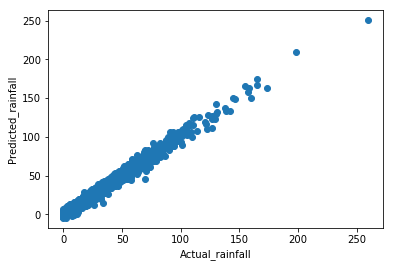

In [247]:
plt.scatter(Y_actual,Y_predicted)
plt.xlabel('Actual_rainfall')
plt.ylabel('Predicted_rainfall')
plt.show()

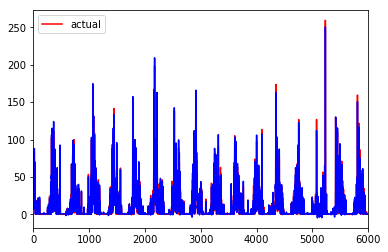

In [248]:
Y_actual = Y_actual.reset_index()
Y_actual.drop('index',axis=1,inplace=True)
Y_actual['actual']=Y_actual[to_predict]
Y_actual.drop(to_predict,axis=1,inplace=True)
Y_actual.plot(color='r')
pd.Series(Y_predicted).plot(color='b')
plt.show()

### ARIMA Modelling

In [382]:
ts = pd.DataFrame()

In [383]:
ts['time_series']=df[coordinates[1]]

In [384]:
ts['DATE']=df['DATE']

In [385]:
ts['DATE']=pd.to_datetime(ts['DATE'])

In [386]:
ts.set_index('DATE',inplace=True)

### averaging for each month

In [387]:
### ts= ts.groupby(pd.TimeGrouper("M")).sum()/30

In [388]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=96)
    rolstd = pd.rolling_std(timeseries, window=96)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput 

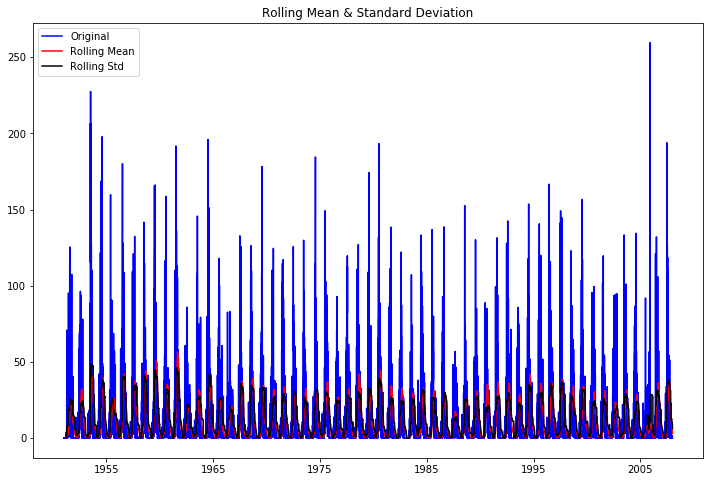

Results of Dickey-Fuller Test:
Test Statistic                -1.338939e+01
p-value                        4.800963e-25
#Lags Used                     3.100000e+01
Number of Observations Used    2.078700e+04
Critical Value (5%)           -2.861679e+00
Critical Value (1%)           -3.430665e+00
Critical Value (10%)          -2.566844e+00
dtype: float64


In [389]:
test_stationarity(ts.time_series)

### Differencing the time series to make data stationary

In [390]:
ts['diff_time_series'] =  (ts.time_series-ts.time_series.shift(1)).fillna(0)

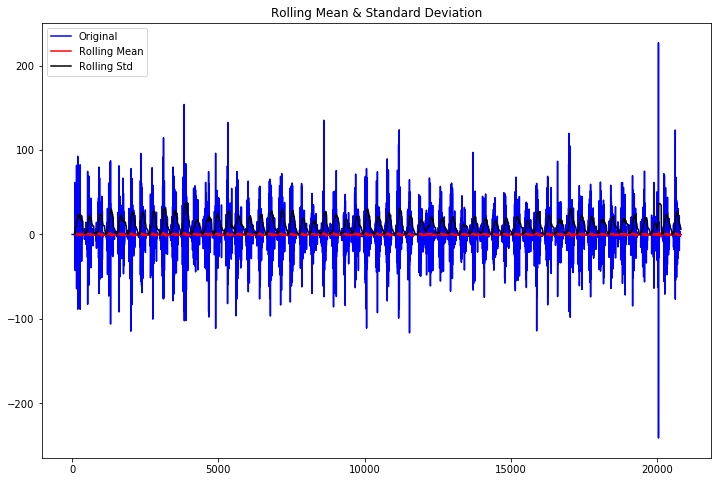

Results of Dickey-Fuller Test:
Test Statistic                   -36.141871
p-value                            0.000000
#Lags Used                        30.000000
Number of Observations Used    20788.000000
Critical Value (5%)               -2.861679
Critical Value (1%)               -3.430665
Critical Value (10%)              -2.566844
dtype: float64


In [391]:
test_stationarity(diff_time_series)

In [392]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(diff_time_series, nlags=5)
lag_pacf = pacf(diff_time_series, nlags=5, method='ols')

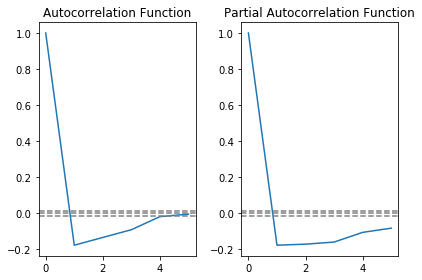

In [393]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff_time_series)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff_time_series)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff_time_series)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff_time_series)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

### The above observation tells AR to be 1 and MA to be 1

### ARIMA(1,1,1)

In [452]:
import pyflux as pf
model = pf.ARIMA(data=ts.head(16000),ar=1,ma=1,integ=1,target='diff_time_series')

In [453]:
x = model.fit("MLE")
x.summary()

Normal ARIMA(1,1,1)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced diff_time_series        Method: MLE                                       
Start Date: 1951-01-02 00:00:00                         Log Likelihood: -62790.8611                       
End Date: 1994-10-21 00:00:00                           AIC: 125589.7221                                  
Number of observations: 15998                           BIC: 125620.443                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 -0.0003    0.0045     -0.0582  0.9536   (-0.009 | 0.0085)        
AR(1)                                

### Equation for prediction

In [454]:
Actuals=ts.tail(360)

In [455]:
Actuals.reset_index(inplace=True)

In [456]:
def forecasts(pre_diff_value,pre_error,Actuals) :
    for i in range(1,360):
        curr_diff_value = -0.0003-0.1657 *Actuals.diff_time_series[i-1]-0.9467*pre_error
        curr_actual_value=Actuals.time_series[i-1]+ curr_diff_value
        #curr_actual_value=curr_diff_value
        if curr_actual_value < 0 :
            curr_actual_value = 0.5*Actuals.time_series[i-1]
        predictions.append(curr_actual_value)
        curr_error=curr_actual_value - Actuals.time_series[i]
    

In [457]:
predictions=[]

In [458]:
forecasts(0,0,Actuals)

In [459]:
Actuals=Actuals.ix[1:]

In [460]:
Actuals['predictions']=predictions

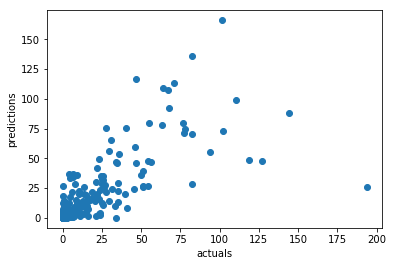

In [461]:
x=Actuals.time_series
y=Actuals.predictions
plt.xlabel('actuals')
plt.ylabel('predictions')
plt.scatter(x,y)
plt.show()

In [428]:
r2_score(Actuals.time_series,Actuals.predictions)

0.5686255490516231